In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import nfl_data_py as nfl
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
#importing play-by-play data to dataframe
df = nfl.import_pbp_data(range(2010,2024), downcast=True, cache=False, alt_path=None)

2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.


In [4]:
#displaying first 10 rows of dataset
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.head(10)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [5]:
#identifying subset of columns of interest and creating a new dataframe filtered to just these columns
columns = ['play_id', 'game_id', 'home_team', 'away_team', 'season_type', 'week', 'game_date', 'posteam', 'posteam_type', 'yardline_100', 'game_seconds_remaining', 'qtr', 'down', 'ydstogo', 'play_type', 'yards_gained', 'desc', 'posteam_score', 'defteam_score', 'score_differential', 'season', 'away_score', 'home_score', 'result']
df_reduced = df[columns]
df_reduced.head(10)

,play_id,game_id,home_team,away_team,season_type,week,game_date,posteam,posteam_type,yardline_100,game_seconds_remaining,qtr,down,ydstogo,play_type,yards_gained,desc,posteam_score,defteam_score,score_differential,season,away_score,home_score,result
0,1.0,2010_01_ARI_STL,LA,ARI,REG,1,2010-09-12,None,None,NaN,3600.0,1.0,NaN,0.0,None,NaN,GAME,NaN,NaN,NaN,2010,17,13,-4
1,36.0,2010_01_ARI_STL,LA,ARI,REG,1,2010-09-12,ARI,away,30.0,3600.0,1.0,NaN,0.0,kickoff,0.0,3-Josh.Brown kicks 70 yards from STL 30 to ARI...,0.0,0.0,0.0,2010,17,13,-4
2,58.0,2010_01_ARI_STL,LA,ARI,REG,1,2010-09-12,ARI,away,78.0,3595.0,1.0,1.0,10.0,pass,0.0,(14:55) 3-D.Anderson pass short right to 83-S....,0.0,0.0,0.0,2010,17,13,-4
3,82.0,2010_01_ARI_STL,LA,ARI,REG,1,2010-09-12,ARI,away,78.0,3564.0,1.0,2.0,10.0,run,5.0,(14:24) 34-T.Hightower left end to ARI 27 for ...,0.0,0.0,0.0,2010,17,13,-4
4,103.0,2010_01_ARI_STL,LA,ARI,REG,1,2010-09-12,ARI,away,73.0,3523.0,1.0,3.0,5.0,pass,18.0,(13:43) (Shotgun) 3-D.Anderson pass short righ...,0.0,0.0,0.0,2010,17,13,-4
5,132.0,2010_01_ARI_STL,LA,ARI,REG,1,2010-09-12,ARI,away,55.0,3497.0,1.0,1.0,10.0,pass,17.0,(13:17) (Shotgun) 3-D.Anderson pass short righ...,0.0,0.0,0.0,2010,17,13,-4
6,156.0,2010_01_ARI_STL,LA,ARI,REG,1,2010-09-12,ARI,away,38.0,3472.0,1.0,1.0,10.0,run,2.0,(12:52) 34-T.Hightower left guard to STL 36 fo...,0.0,0.0,0.0,2010,17,13,-4
7,177.0,2010_01_ARI_STL,LA,ARI,REG,1,2010-09-12,ARI,away,36.0,3427.0,1.0,2.0,8.0,pass,12.0,(12:07) (Shotgun) 3-D.Anderson pass short righ...,0.0,0.0,0.0,2010,17,13,-4
8,201.0,2010_01_ARI_STL,LA,ARI,REG,1,2010-09-12,ARI,away,24.0,3401.0,1.0,1.0,10.0,run,2.0,(11:41) (Shotgun) 34-T.Hightower right tackle ...,0.0,0.0,0.0,2010,17,13,-4
9,222.0,2010_01_ARI_STL,LA,ARI,REG,1,2010-09-12,ARI,away,22.0,3363.0,1.0,2.0,8.0,run,-3.0,(11:03) 34-T.Hightower left tackle to STL 21 f...,0.0,0.0,0.0,2010,17,13,-4


In [6]:
#creating new columns 1) identifying the winning team of the game and 2) a yes/no variable stating if the team in posession ultimately won
df_reduced.loc[:, 'winner'] = np.where(df_reduced['home_score'] > df_reduced['away_score'], df_reduced['home_team'], df_reduced['away_team'])
df_reduced.loc[:, 'poswins'] = np.where(df_reduced['winner'] == df_reduced['posteam'], 'Yes', 'No')

/var/folders/01/w3k5_y_x4mg_4y82c4n3pz0c0000gn/T/ipykernel_34391/1527068975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced.loc[:, 'winner'] = np.where(df_reduced['home_score'] > df_reduced['away_score'], df_reduced['home_team'], df_reduced['away_team'])
/var/folders/01/w3k5_y_x4mg_4y82c4n3pz0c0000gn/T/ipykernel_34391/1527068975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced.loc[:, 'poswins'] = np.where(df_reduced['winner'] == df_reduced['posteam'], 'Yes', 'No')


In [7]:
#dropping "no play" plays and plays occuring outside of regulation
df_reduced = df_reduced[(df_reduced['play_type'] != "no_play") & 
                        (df_reduced['play_type'] != "None") & 
                        (df_reduced['qtr'] <= 4)]
df_reduced = df_reduced.dropna(subset=['down'])

In [8]:
#splitting data into training/testing components
train, test = train_test_split(df_reduced, test_size=0.2, random_state=123)
test_y = test['poswins']

In [9]:
#creating formula to define target and explanatory variables when fitting model
formula = 'poswins ~ qtr + down + ydstogo + yardline_100 + score_differential + game_seconds_remaining'

In [10]:
#fitting model to training dataset
model = smf.glm(formula = formula, data = train, family = sm.families.Binomial())
result = model.fit()
print(result.summary()) #printing results summary

                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['poswins[No]', 'poswins[Yes]']   No. Observations:               422526
Model:                                         GLM   Df Residuals:                   422519
Model Family:                             Binomial   Df Model:                            6
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:            -2.1041e+05
Date:                             Fri, 12 Jul 2024   Deviance:                   4.2083e+05
Time:                                     13:07:34   Pearson chi2:                 4.12e+05
No. Iterations:                                  6   Pseudo R-squ. (CS):             0.3230
Covariance Type:                         nonrobust                                         
                             coef    std err          z      P>|z|      [0.025  

In [11]:
#printing coefficients and p-values
print("Coefficients")
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()
print("Dependent variables")
print(result.model.endog_names)

Coefficients
Intercept                -1.189467
qtr                       0.031292
down                      0.114077
ydstogo                   0.010516
yardline_100              0.008788
score_differential       -0.174499
game_seconds_remaining    0.000040
dtype: float64

p-Values
Intercept                  3.499774e-91
qtr                        1.742662e-02
down                      7.541913e-190
ydstogo                    7.682719e-27
yardline_100               0.000000e+00
score_differential         0.000000e+00
game_seconds_remaining     3.699955e-03
dtype: float64

Dependent variables
['poswins[No]', 'poswins[Yes]']


In [12]:
#using model to make predictions on test dataset
predictions = result.predict(test)
#logic for converting probability predictions to binary values
predictions_nominal = [ "Yes" if x < 0.5 else "No" for x in predictions]
#running classification report to compare predicted to actual values
print(classification_report(test_y, 
                            predictions_nominal, 
                            digits = 3))

/Users/aishaneew/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aishaneew/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aishaneew/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aishaneew/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

              precision    recall  f1-score   support

          No      0.758     0.714     0.735     52311
         Yes      0.734     0.777     0.755     53321

    accuracy                          0.746    105632
   macro avg      0.746     0.745     0.745    105632
weighted avg      0.746     0.746     0.745    105632



In [13]:
#adding in win probability predictions to original dataframe (complete)
pred = result.predict(df_reduced)
df_reduced['pred'] = pred
#adding in a column that always calculates the win probability for the home team, regardless of the team currently in posession
df_reduced['predh'] = np.where(df_reduced['posteam_type'] == 'home', 1-df_reduced['pred'], df_reduced['pred'])

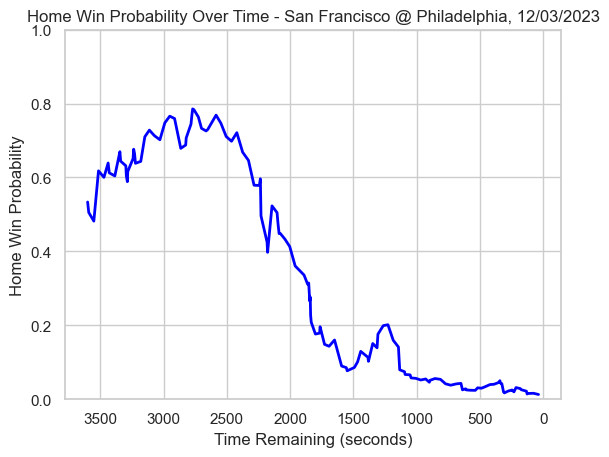

In [14]:
import matplotlib.pyplot as plt
#filtering dataframe to a specific game (SF at Philly 12/03/2023)
filtered_df = df_reduced[df_reduced['game_id'] == "2023_13_SF_PHI"]
#plotting win probability over time for game
plt.plot(filtered_df['game_seconds_remaining'], filtered_df['predh'], color='blue', linewidth=2)
plt.gca().invert_xaxis()  # reversing the x-axis
plt.ylim(0, 1)  # setting y-axis limits
plt.xlabel("Time Remaining (seconds)")
plt.ylabel("Home Win Probability")
plt.title("Home Win Probability Over Time - San Francisco @ Philadelphia, 12/03/2023")
plt.show()

/Users/aishaneew/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aishaneew/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aishaneew/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aishaneew/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

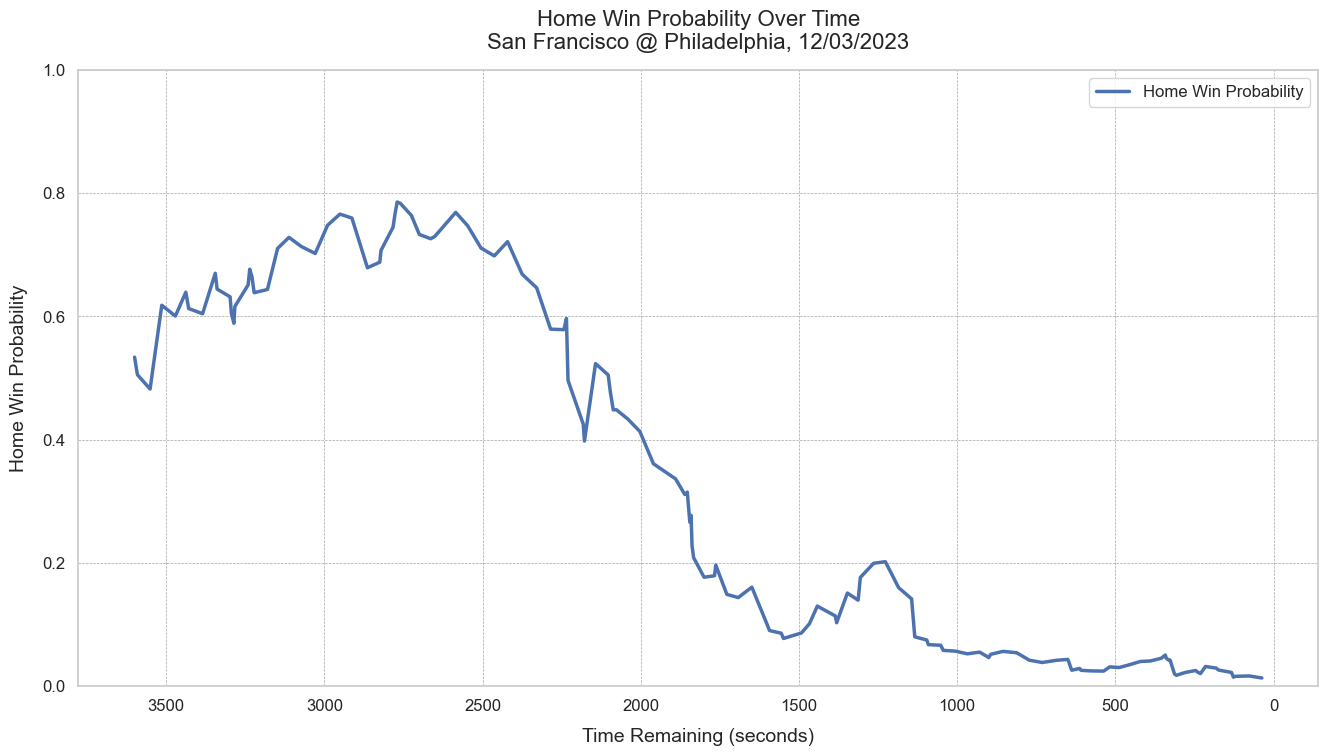

In [18]:
#making the graph nicer
import seaborn as sns
#setting seaborn style
sns.set(style="whitegrid")
#defining color palette
palette = sns.color_palette("deep")
#filtering dataframe to a specific game (SF at Philly 12/03/2023)
filtered_df = df_reduced[df_reduced['game_id'] == "2023_13_SF_PHI"]
#creating the plot
plt.figure(figsize=(16, 8))
sns.lineplot(
    x='game_seconds_remaining', 
    y='predh', 
    data=filtered_df, 
    color=palette[0], 
    linewidth=2.5, 
    label='Home Win Probability'
)
#reversing x-axis
plt.gca().invert_xaxis()
#setting y-axis limits
plt.ylim(0, 1)
#adding labels and title
plt.xlabel("Time Remaining (seconds)", fontsize=14, labelpad=10)
plt.ylabel("Home Win Probability", fontsize=14, labelpad=10)
plt.title("Home Win Probability Over Time\nSan Francisco @ Philadelphia, 12/03/2023", fontsize=16, pad=15)
#customizing the grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
#customizing ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#adding legend
plt.legend(loc='best', fontsize=12)
#displaying
plt.show()